# Linear Regression

## Univariate linear regression

The code below generates a synthetic training dataset assuming that the response y is a linear function of an attribute x. This is referred to as a generative model.

Complete the code to determine the the optimal linear regression coefficients for the data that minimizes mean square error using (1) analytical expression we learned in class; and (2) using the "polyfit" and "polyval" functions from the numpy.polynomial.polynomial class.


### Generate Data

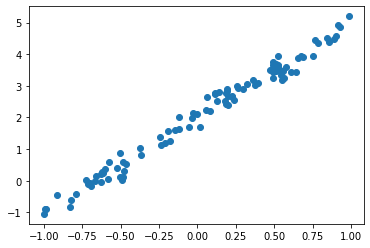

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

nsamp = 100;
wstd = 0.2; 
beta = np.array([2,3]);

# Training data points 
xd = np.random.uniform(-1,1,nsamp);
y0 = poly.polyval(xd,beta);

yd = y0 + np.random.normal(0,wstd,nsamp);

fig, ax = plt.subplots()
ax.scatter(xd, yd)

### Analytical Model

**Q1**: Complete the code below using closed form expressions for $\beta_0, \beta_1$.

In [2]:
#Analytical model
xm = np.mean(xd)
ym = np.mean(yd)
syy = np.mean((yd-ym)**2)
sxy = np.mean((xd-xm)*(yd-ym))
sxx = np.mean((xd-xm)**2)
# beta1 = # linear term
beta1 = sxy/sxx # linear term
# beta0 = # constant term
beta0 = ym - beta1*xm # constant term
analyticalModel = np.array([beta0,beta1])

### Evaluate Your Model

**Q2**: Obtain predictions from your analytical model for randomly generated inputs. Next use the in-built polyfit function to do the same. 

**Analytical Model Result**

In [3]:
#evaluate your model

# new data
# xplot = # generate uniform points between -1 and 1
xplot = np.random.uniform(-1,1,nsamp)

# prediction
# ypredict = # get prediction on data xplot
ypredict =  analyticalModel[1]*xplot +analyticalModel[0]

**Polyfit Model Prediction**

In [4]:
# polyfitModel = #use the polyfit function
polyfitModel = poly.polyfit(xd, yd, 1) #use the polyfit function
# yfit = # use the polyval function to evaluate polyfitModel at x = xplot 
yfit = polyfitModel[1]*xplot +polyfitModel[0] # use the polyval function to evaluate polyfitModel at x = xplot 

### Plot Result

**Q3**: Plot results of polyfit model and analytical model. The plots should contain both the (x,y) training data points and the fitted lines.

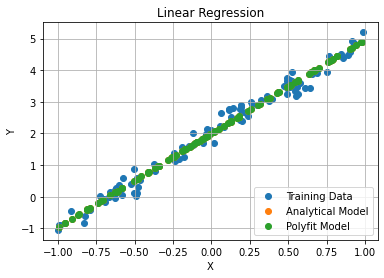

In [5]:
#plot your results
fig, ax = plt.subplots()
ax.scatter(xd, yd)

# Plot polyfit model and analytical model result:
# Your Code

ax.scatter(xplot, ypredict)
ax.scatter(xplot,yfit)
ax.legend(['Training Data','Analytical Model', 
           'Polyfit Model'],loc='lower right')

ax.set(xlabel='X', ylabel='Y',
       title='Linear Regression')
ax.grid()
plt.show()

## Application of Linear Regression

In this part, you'll use Linear Regression on a real-world dataset. The datatset contains sales number of a product versus the advertising of the product on TV, radio and newspaper. The question we want to ask is how advertising on each of these channels impacts sales.

### Read Data

**Q4**: Split data into train and test, by reserving **70** percent of the data for training and the rest for test. 

In [6]:
import pandas as pd
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()
msk = np.random.rand(len(df)) < 0.8
# train, test = # Use function or your own code to split df
train, test = df[msk],  df[~msk]# Use function or your own code to split df
train1 = np.array(train)
test1 = np.array(test)

### Linear Regression Model

**Q5**: Use linear regression model to describe sales as a linear function  of advertising on TV, newspaper, and radio. That is, you should independently regress sales against advertising on each of these media.

In [7]:
def fit_linear(x,y):
    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    sxy = np.mean((x-xm)*(y-ym))
    sxx = np.mean((x-xm)**2)
    beta1 = sxy/sxx
    beta0 = ym - beta1*xm
    beta = np.array([beta0, beta1])
    return beta

In [8]:
# sales_TV_beta     = # Use function or your own code to do linear regression
# sales_newspaper_beta  = # 
# sales_radio_beta    = #

sales_TV_beta     = fit_linear(train1[0],train1[-1])
sales_newspaper_beta  = fit_linear(train1[1],train1[-1])
sales_radio_beta    = fit_linear(train1[2],train1[-1])

### Plot Data

**Q6**: Use the models to do prediction and plot *test* data points and predctions of 3 models

In [9]:
# Prediction:
sales_TV_predict = sales_TV_beta[1] * test1[0] + sales_TV_beta[0]
sales_newspaper_predict = sales_newspaper_beta[1] * test1[0] + sales_newspaper_beta[0]
sales_radio_predict = sales_radio_beta[1] * test1[0] + sales_radio_beta[0]

Text(0, 0.5, 'Sales')

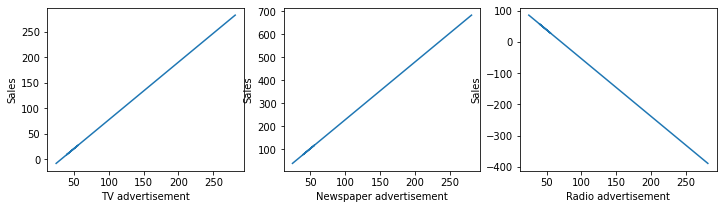

In [10]:
fig = plt.figure(figsize=(12,3))

## Sales to TV spend
plt.subplot(1,3,1)
'''
  Your code
'''
plt.plot(test1[0],sales_TV_predict)
plt.ylabel('Sales')
plt.xlabel('TV advertisement')


## Sales to newspaper spend
plt.subplot(1,3,2)
'''
  Your code
'''
plt.plot(test1[0],sales_newspaper_predict)
plt.ylabel('Sales')
plt.xlabel('Newspaper advertisement')


## Sales to radio spend
plt.subplot(1,3,3)
'''
  Your code
'''
plt.plot(test1[0],sales_radio_predict)
plt.xlabel('Radio advertisement')
plt.ylabel('Sales')

## Multivariate Linear Regression

**Q7**: Use all three features ('TV', 'Radio', newspaper') to predict sales using multivariate linear regression.

In [11]:
# Define training X matrix
X = np.vstack((np.ones(train['newspaper'].size), train['newspaper'], train['radio'], train['TV']))
trainX = X.transpose()

# Define training Y matrix
trainY = train['sales']

trainY1 = np.array(trainY)

# Get your Model(Using the closed form in class)
# multivariate_beta = # beta = (XT * X)^-1 * XT * Y

multivariate_beta = (np.linalg.inv(X.dot(trainX)).dot(X)).dot(trainY)

### Evaluate Model

**Q8**: use your multivariate model to do predictions on test data

In [12]:
# Define testing X matrix
X = np.vstack((np.ones(test['newspaper'].size), test['newspaper'], test['radio'], test['TV']))
testX = X.transpose()

# Define testing Y matrix
testY = test['sales']

# Predcit result using your model multivariate_beta
pred = testX.dot(multivariate_beta)

### Plot Result

**Q9**: Plot your predictions against real labels.

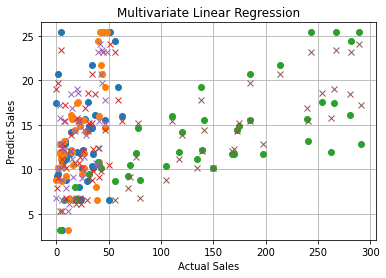

In [13]:
fig, ax = plt.subplots()

# Your Code
plotX = testX[:,1:]
ax.plot(plotX, testY, 'o')
ax.plot(plotX, pred,('x'))


ax.set(xlabel='Actual Sales', ylabel='Predict Sales',
       title='Multivariate Linear Regression')
ax.grid()
plt.show()